# **Interpretable Counterfactual Explanations Guided by Prototypes**


---



# **Resumen general**
<p align="justify">
En este metodo se propone utilizar prototipos de clase en una función objetivo para guiar rápidamente las perturbaciones hacia contrafactuales interpretables. Este enfoque ayuda a eliminar cuellos de botella computacionales en modelos de caja negra al reducir la necesidad de cálculos numéricos de gradientes. Además, se introducen dos nuevas métricas para cuantificar la interpretabilidad a nivel de instancia. Ademas proponen el uso de medidas de distancia por pares entre categorías de variables categóricas para definir perturbaciones significativas.

Aportaciones principales:

*  Uso de prototipos de clase para guiar la generación de contrafactuales, mejorando la interpretabilidad y eficiencia computacional.
*  Introducción de dos métricas novedosas para evaluar la interpretabilidad de los contrafactuales a nivel individual.
*  Enfoque fundamentado para variables categóricas, utilizando medidas de distancia para definir perturbaciones significativas en estas variables.

# **Introducción**

[Arnaud Van Looveren](https://scholar.google.com/citations?user=Hio02n8AAAAJ&hl=en) y [Janis Klaise](https://scholar.google.co.uk/citations?user=kZVFp18AAAAJ&hl=en) proponen un nuevo metodo de interpretabilidad basado en contrafactuales, particularmente se centran en hacer uso de los prototipos de una clase determinada y así encontrar un contrafactual que tengan mas sentido con respecto a el conjunto de datos.

En este metodo el objetivo es encontrar una instancia contrafactual la cual se llamara $x_{cf}$ y debera de cumplir con cuatro premisas:



1.   La predición del modelo $M$ cuando se le pasa $x_{cf}$ debe de ser cercana a una salida determinada, la podemos llamar $t_{0}$
2.   La perturbación $\delta$ debe ser debe ser "sparse" es decir que afecte la menor cantidad posible a determinada instancia, es importante aclarar en este punto que $x_{cf} = x_{0} + \delta $, donde $x_{0}$ es la instancia original.
3.  El contrafactual $x_{cf}$ debe de ser interpretable es decir que se debe de encontrar cercana a la distribución de los datos con respecto a la clase contrafactual, esto significa que los cambios realizados en las características para alterar la predicción deben ser realistas y consistentes con los ejemplos de la clase a la que se está intentando mover el contrafactual, asegurando que sea fácil de interpretar.
4.  $x_{cf}$ debe de ser encontrado en un tiempo prudente para poder ser utilizado en problemas reales.





# **Metodo**

Para la explicación de este metodo partiremos de la definición previa de contrafactual.
<center>
$x_{cf} = x_{0} + \delta $
</center>

Recordemos que los que se busca es encontrar una instacia contrafactual $x_{cf}$ la cual se genere a partir de nuestra instancia de interes $x_{0}$ y la suma de una perturbación $\delta$, teniendo esto en cuenta nuestro objetivo sera encontrar la perturbación $\delta$, para ello definiremos una función de perdida $L$ la cual deberemos optimizar, ayudandonos asi a econtrar el valor de $\delta$ con base a algunos criterios que se encuentran implicitos en la función $L$ .

Deberemos optimizar a $L$ de la siguiente manera

$$
\min_{\delta} \,  \cdot L.
$$

Esto se traduce el valor minimo de $\delta$ para $L$. La definición general de $L$ es la siguiente:

<center>
$$
L = c \cdot L_{pred} + \beta \cdot L_1 + L_2 + L_{AE} + L_{proto}
$$
</center>

A continuación analizaremos cada parte de la la función de perdida.

$$
L_{pred} := \max \left( [f_{pred}(x_0 + \delta)]_{t_0} - \max_{i \neq t_0} [f_{pred}(x_0 + \delta)]_i, -\kappa \right)
$$

*  $[f_{pred}(x_0 + \delta)]_{t_0}$ representa a la predición en terminos de probabilidad del modelo $M$ para la instancia $x_0 + \delta$ (nuestro contrafactual $x_{cf}$ ) con respecto a la clase $t_0$, esta clase es la que originalmente se relación con la entrada $x_0$.

* $\max_{i \neq t_0} [f_{pred}(x_0 + \delta)]_i$, donde $[f_{pred}(x_0 + \delta)]_i$ es la probabilidad generada por el modelo $M$ para la instancia $x_0 + \delta$ en la clase $i$, aqui estamos buscando el valor maximo de probabilidad para una determinada clase diferente a la clase $t_0$ ($i \neq t_0$)

*  $-k$ este termino funciona como un limite inferior

En general lo que buscamos en $L_{pred}$ es realizar la resta entre las probabilidades generadas por el modelo $M$ para la instancia $x_0 + \delta$, se toma la instancia orginal $t_0$ y la instancia con mayor en probabilidad para la clase $i$ la cual debe de ser diferente de $t_0$, si el valor de la resta es menor que $-k$ se retorna el valor de $-k$, si no es asi se retornara el valor de la dicha resta, en conclusión el objetivo de esta función es empujar la predicción de la instancia contrafactual hacia una clase diferente a la original.

La siguiente función se asocia con la distancia entre el contrafactual $x_0 + \delta$ y la instancia original $x_0$:

$$
\beta \cdot L_1 + L_2 = \beta \cdot \|\delta\|_1 + \|\delta\|_2^2
$$

En esta función de optimización se utiliza la regularización elastic net conformada por $L_1$ y $L_2$ a continuación se explicara cada parametro

*  $\|\delta\|_1$ este término favorece la esparsidad, lo que significa que minimiza la cantidad de elementos no nulos en la solución, en contexto, trata de hacer que los cambios (o perturbaciones) necesarios para obtener el contrafactual sean los mínimos posibles, es decir, que se alteren solo algunas características.

*   $\|\delta\|_2^2$ este término favorece soluciones que sean suaves o pequeñas en magnitud. Penaliza cambios grandes en las perturbaciones, haciendo que las modificaciones que se apliquen a las características del contrafactual sean más "pequeñas" en términos de magnitud.

*  $\beta$ actúa como un factor de control que balancea la influencia de la regularización en la función de perdida general


Continuado con el analisis tenemos a $L_{AE}$ que viene presentada por una regularización $L_2$ aplicada al error de reconstrucción de la instancia $x_{cf}$ evaluada por un autoencoder, el objetivo de esta función es penalizar los contrafactuales que se encuentran por fuera de la distribución de conjunto de datos orginal, esto se expresa de la siguiente forma,

$$
L_{AE} = \gamma \cdot \|x_0 + \delta - AE(x_0 + \delta)\|_2^2
$$

El funcionamiento de esta función es muy simple, en teoria si el contrafactual $x_{cf}$ se encuentra cercano a la distribución de los datos originales el autoencoder generara una salida similar al valor del contrafactual generando que la resta sea 0 o cercana a la misma, reduciendo el efecto en la optimización, por otra parte si se encuentra lejos de la distribución de los datos el error seria grande y se reducce un poco el efecto con la normalización $L_2$.

Por ultimo tenemos a $L_{proto}$ la cual se define de la siguiente manera

$$
L_{\text{proto}} = \theta \cdot \| \text{ENC}(x_0 + \delta) - \text{proto}_j \|_2^2
$$

El objetivo para esta función es el orientar las perturbaciones $\delta$ hacia un $x_{cf}$ contrafáctico interpretable que caiga en la distribución de la clase contrafáctica $i$, ademas de acelerar el proceso de búsqueda contrafáctica sin demasiado ajuste de hiperparámetros.

Para definir el prototipo para una determina clase (para este caso la clase $i$) se utiliza el codificador del AE utilizado en la función de perdida $L_{AE}$ junto a un conjunto de instancias $K$ mas cercanas en el espacio latente generado por el codificador.

$$
\text{proto}_i := \frac{1}{K} \sum_{k=1}^{K} \text{ENC}(x_k^i)
$$

Posteriormente se calcula la **distancia euclidiana** entre la codificación de la instancia inicia $x_0$  y el prototipo para la clase $i$ es decir $\text{proto}_i $ dando como resultado la clase que mas se acerca a la instancia origina $x_0$ en el espacio latente es decir $j$.

$$
j = \arg \min_{i \neq t_0} \|\text{ENC}(x_0) - \text{proto}_i\|_2
$$

Con esto presente podemos concluir que $L_{\text{proto}}$ busca guiar las perturbaciones $\delta$ hacia el prototipo mas cercano $\text{proto}_j$ de la clase $j$

Nota: Si no se tiene un codificador entrenado, se pueden generar prototipos de clase utilizando **k-d trees**. Primero, se etiqueta el conjunto de entrenamiento representativo usando el modelo predictivo. Luego, se construye un **k-d tree** separado para cada clase, usando las instancias con esa etiqueta de clase. Para una instancia $ x_0 $, se calcula la **distancia euclidiana** entre $x_0 $ y el elemento más cercano en el k-d tree de cada clase $j \neq t_0 $. El elemento más cercano de una clase distinta se convierte en el **prototipo de clase** $ \text{proto}_j$, y este proceso ocurre en el **espacio de características original**.

Otro dato a tener en cuenta es que las variables categóricas no tienen un orden o distancia clara entre sus valores, se infieren distancias entre las categorías utilizando dos enfoques: basadas en predicciones del modelo o en la relación con otras variables del conjunto de datos. Luego, se aplica un escalado multidimensional para proyectar estas distancias en un espacio euclidiano, donde se realizan las perturbaciones. Después de la perturbación, se mapea el número resultante de vuelta a la categoría más cercana antes de evaluar la predicción del modelo.


# **Algoritmos**

A continuación se muestra el algoritmo para llevar a cabo este proceso.


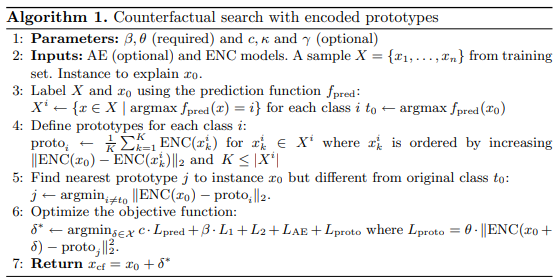


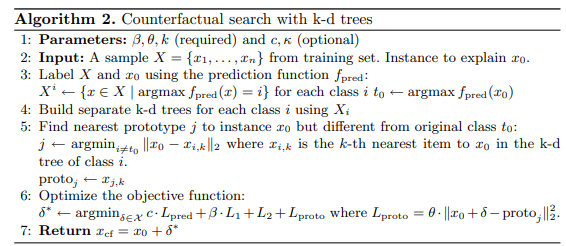

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/XIA_ARENA

/content/drive/.shortcut-targets-by-id/15c--rydBcqBxI3FZzyvMhzekrQwK6BjV/XIA_ARENA


# **IMPLEMENTATION OF CGP**

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

def loss_pred(fpred, x_cf,kappa, t0):
    # Calcular L_pred
    outputs = fpred(x_cf)
    logits = outputs
    top2 = torch.topk(logits, 2).values.squeeze()
    if kappa > 0:
        kappa_tensor = torch.tensor(-kappa, device=top2.device, dtype=top2.dtype)
        L_pred = torch.max(top2[0] - top2[1],  kappa_tensor)
    else:
        # Si no se usa kappa, simplemente minimizar la probabilidad de la clase original
        L_pred = outputs[0, t0]

    return L_pred

def loss_l1_l2(delta):
    # Calcular L1 y L2
    L1 = torch.norm(delta, p=1)
    L2 = torch.norm(delta, p=2)

    return L1,L2

def loss_AE(AE,x_cf,gamma):
    # Calcular L_AE (si se proporciona AE)
    if AE is not None:
        x_recon = AE(x_cf)
        L_AE = gamma * torch.norm(x_cf - x_recon.squeeze(), p=2)
    else:
        L_AE = 0

    return L_AE

def loss_proto(ENC,x_cf,proto_j,theta,p=2):
  # Calcular L_proto
    x_cf_enc = ENC(x_cf)
    L_proto = theta * torch.norm(x_cf_enc - proto_j, p) ** 2

    return L_proto

def loss_cgp(c, L_pred, beta, L1, L2,L_AE,L_proto,trust=None, trust_threshold=1.5):
    # Función de pérdida total
    # trust_penalty = 0
    # if trust is not None and trust < trust_threshold:
    #     trust_penalty = (trust_threshold - trust) ** 2

    # Agregar la penalización al Trust Score
    loss = c * L_pred + beta * (L1 + L2) + L_AE + L_proto #+ trust_penalty
    return loss


def verbose_print(verbose,iteration,max_iter,loss,L_pred,L1,L2,L_AE,L_proto,AE):

    if verbose:
      log_message = f"Iteration {iteration + 1}/{max_iter}: Total Loss = {loss.item():.6f}, " \
                    f"L_pred = {L_pred.item():.6f}, L1 = {L1.item():.6f}, L2 = {L2.item():.6f}, "
      if AE is not None:
          log_message += f"L_AE = {L_AE.item():.6f}, "
      log_message += f"L_proto = {L_proto.item():.6f}"
      print(log_message)

def plot_loss(plot, losses):
    if plot:
      plt.figure(figsize=(10, 6))
      plt.plot(losses, label="Loss")
      plt.xlabel("Iteration")
      plt.ylabel("Loss")
      plt.title("Evolution of Loss during Optimization")
      plt.legend()
      plt.grid(True)
      plt.show()

def trust_score(ENC, x_cf, proto_t0, proto_j):
    # Calcula la relación de distancias entre el prototipo de la clase original y la clase objetivo
    x_cf_enc = ENC(x_cf)
    dist_t0 = torch.norm(x_cf_enc - proto_t0)
    dist_j = torch.norm(x_cf_enc - proto_j)
    return dist_t0 / (dist_j + 1e-8)  # Evitar divisiones por cero

def find_counterfactual(
    x0,               # Instancia a explicar (tensor de PyTorch)
    X,                # Muestra del conjunto de entrenamiento (tensor de PyTorch)
    fpred,            # Función de predicción del modelo (función o modelo PyTorch)
    ENC,              # Modelo encoder (codificador) del autoencoder (PyTorch)
    AE=None,          # Modelo autoencoder (opcional) (PyTorch)
    beta=0.1,         # Parámetro β (float)
    theta=0.5,        # Parámetro θ (float)
    c=1.0,            # Parámetro c (opcional) (float)
    kappa=0.5,        # Parámetro κ (opcional) (float)
    gamma=0.1,        # Parámetro γ (opcional) (float)
    K=5,              # Número de vecinos para el prototipo (int)
    max_iter=1000,    # Máximo número de iteraciones (int)
    lr=0.01,           # Tasa de aprendizaje para el optimizador (float)
    verbose=True,
    plot=True
):
    """
    Implementa el Algoritmo 1 para encontrar una instancia contrafactual.
    """

    losses = []

    # Asegurarse de que x0 está en el dispositivo correcto
    device = x0.device

    # Paso 3: Etiquetar X y x0 usando la función de predicción fpred
    with torch.no_grad():

        X_preds = fpred(X).argmax(dim=1)
        x0_pred = fpred(x0).argmax(dim=1).item()

    # Crear un diccionario para almacenar las instancias por clase
    classes = torch.unique(X_preds)
    Xi = {i.item(): X[X_preds == i] for i in classes}



    # Paso 4: Definir prototipos para cada clase
    proto = {}
    x0_enc = ENC(x0).detach()

    for i in Xi:
        Xi_i = Xi[i]
        # Codificar las instancias de la clase i

        with torch.no_grad():
            ENC.eval()
            encodings = ENC(Xi_i).detach()
        # Calcular distancias al x0 codificado
        x0_enc_expanded = x0_enc.expand(encodings.size(0), -1, -1, -1)
        distances = torch.norm((encodings - x0_enc_expanded).flatten(1), dim=1)
        # Ordenar por distancia y seleccionar los K más cercanos
        idx_sorted = distances.argsort()[:K]
        # Obtener los K vecinos más cercanos
        nearest_encodings = encodings[idx_sorted]
        # Calcular el prototipo como la media de los K vecinos más cercanos
        proto[i] = nearest_encodings.mean(dim=0)
        if K < 10:
          K += 1

    # Paso 5: Encontrar el prototipo más cercano j a x0 pero diferente de la clase original t0
    min_dist = float('inf')
    t0 = x0_pred
    for i in proto:
        if i != t0:
            dist = torch.norm(x0_enc - proto[i])
            if dist < min_dist:
                min_dist = dist
                j = i
    proto_j = proto[j]

    # Paso 6: Optimizar la función objetivo para encontrar δ*
    # Inicializar δ
    delta = torch.zeros_like(x0, requires_grad=True)
    optimizer = optim.Adam([delta], lr=lr)
    failed_attempts = 0

    for iteration in range(max_iter):
        optimizer.zero_grad()

        # Generar la instancia perturbada x0 + δ
        x_cf = x0 + delta

        # Asegurar que x_cf está dentro de los límites [0,1] (si es necesario)
        x_cf_clipped = torch.clamp(x_cf, 0, 1)

        # Calcular L_pred
        L_pred = loss_pred(fpred, x_cf_clipped,kappa, t0)

        # Calcular L1 , L2
        L1,L2 = loss_l1_l2(delta)

        # Calcular L_AE (si se proporciona AE)
        L_AE = loss_AE(AE,x_cf,gamma)

        # Calcular L_proto
        L_proto = loss_proto(ENC,x_cf_clipped,proto_j,theta)


        proto_t0 = proto[t0]
        trust = trust_score(ENC, x_cf_clipped, proto_t0, proto_j)

        # Función de pérdida total
        loss = loss_cgp(c, L_pred, beta, L1, L2,L_AE,L_proto,trust)

        verbose_print(verbose,iteration,max_iter,loss,L_pred,L1,L2,L_AE,L_proto,AE)

        losses.append(loss.item())

        # Retropropagación
        loss.backward()
        torch.nn.utils.clip_grad_norm_(delta, max_norm=1.0)
        optimizer.step()

        # Opcional: verificar si la predicción ha cambiado a la clase objetivo
        with torch.no_grad():
            pred_cf = fpred(x_cf_clipped).argmax(dim=1).item()

        if pred_cf == j:
            print(f"Contrafactual encontrado en la iteración {iteration}")
            break

        # else:
        #     failed_attempts += 1
        #     if failed_attempts % 50 == 0:
        #       c *= 1.2

    # Paso 7: Retornar x_cf = x0 + δ*
    x_cf_final = x0 + delta.detach()
    x_cf_final = torch.clamp(x_cf_final, 0, 1)  # Asegurar que esté dentro de [0,1]

    plot_loss(plot, losses)

    return x_cf_final

# **DATASET**

In [ ]:
!pip install torchmetrics

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:

# Cargar MNIST con transformaciones adecuadas
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor()])

train_dataset = datasets.MNIST(root='/content/drive/MyDrive/XIA_ARENA/Dataset/dataset_mnist', train=True, download=False, transform=transform)
test_dataset = datasets.MNIST(root='/content/drive/MyDrive/XIA_ARENA/Dataset/dataset_mnist', train=False, download=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

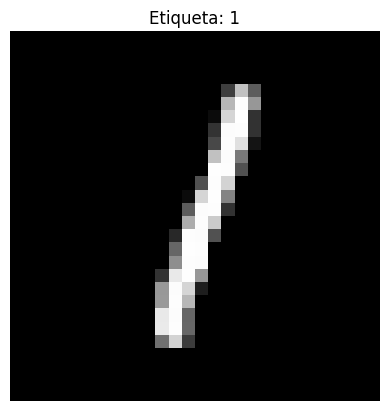

In [ ]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Seleccionar una imagen del lote
image = images[0]  # Selecciona la primera imagen
label = labels[0]  # Selecciona la etiqueta correspondiente

# Convertir el tensor a numpy para mostrarlo
image_np = image.squeeze().numpy()  # Elimina el canal de color si es 1x28x28

# Mostrar la imagen
plt.imshow(image_np, cmap='gray')
plt.title(f"Etiqueta: {label}")
plt.axis('off')
plt.show()

# **AUTOENCODER**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchmetrics.functional import structural_similarity_index_measure as ssim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 1, kernel_size=3, stride=1, padding=1)
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 1, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:70: FutureWarning: Importing `spectral_angle_mapper` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `spectral_angle_mapper` from `torchmetrics.image` instead.
  _future_warning(


Epoch [1/10], Pérdida del Autoencoder: 0.0135, SSIM: 0.0010


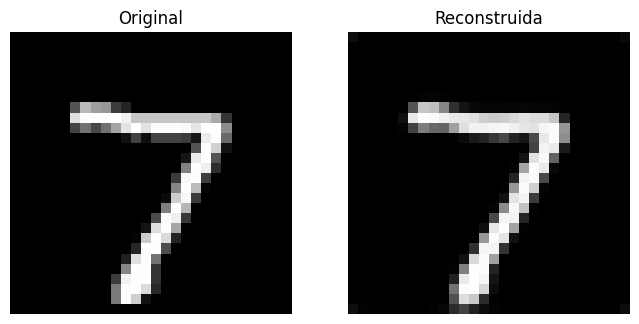

Epoch [2/10], Pérdida del Autoencoder: 0.0016, SSIM: 0.0011


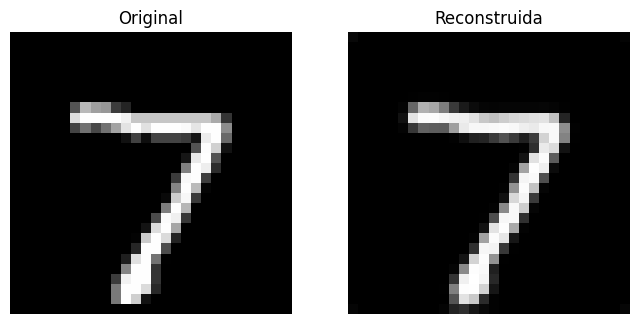

Epoch [3/10], Pérdida del Autoencoder: 0.0014, SSIM: 0.0011


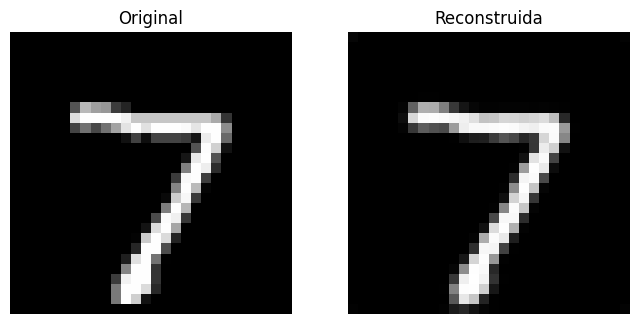

Epoch [4/10], Pérdida del Autoencoder: 0.0012, SSIM: 0.0011


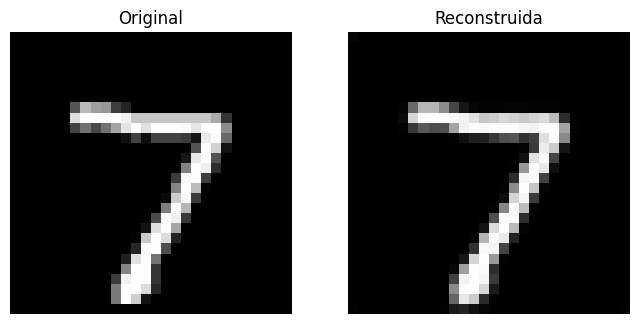

Epoch [5/10], Pérdida del Autoencoder: 0.0011, SSIM: 0.0011


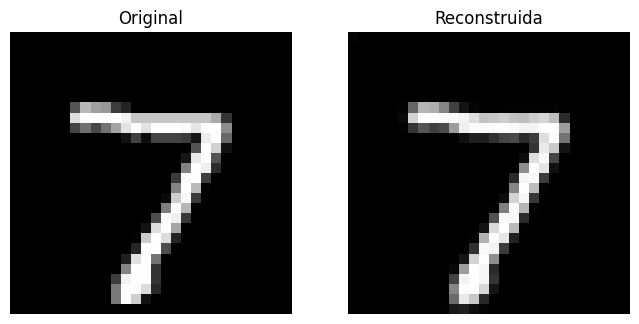

Epoch [6/10], Pérdida del Autoencoder: 0.0011, SSIM: 0.0011


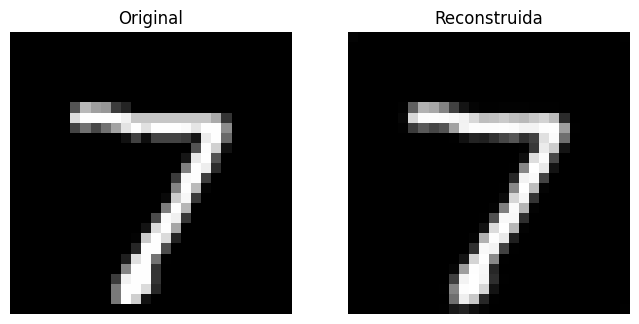

Epoch [7/10], Pérdida del Autoencoder: 0.0010, SSIM: 0.0011


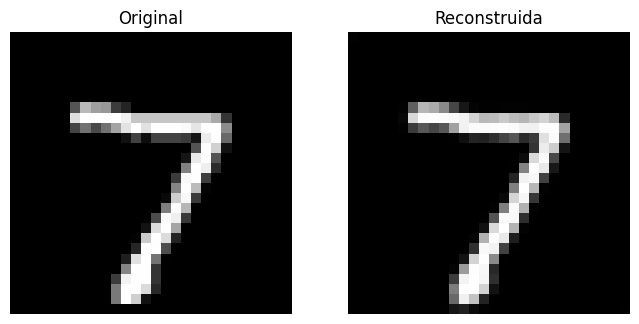

Epoch [8/10], Pérdida del Autoencoder: 0.0010, SSIM: 0.0011


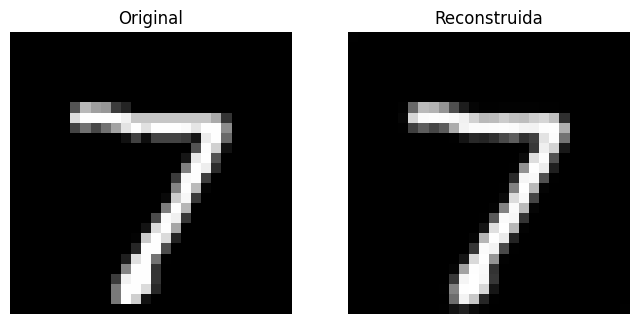

Epoch [9/10], Pérdida del Autoencoder: 0.0010, SSIM: 0.0011


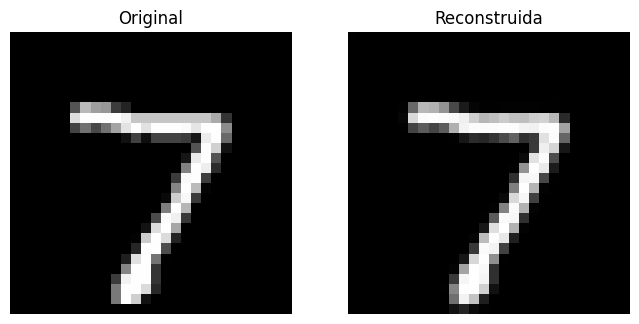

Epoch [10/10], Pérdida del Autoencoder: 0.0009, SSIM: 0.0011


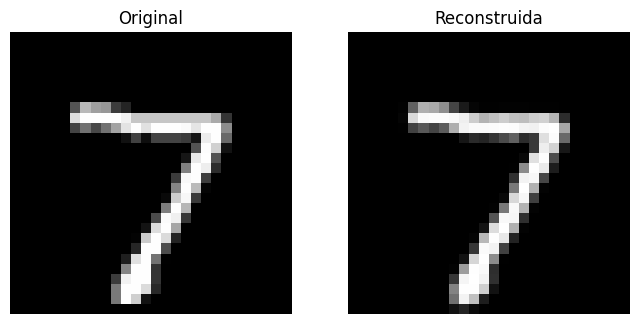

In [ ]:
# Entrenamiento
autoencoder = Autoencoder()
criterion_ae = nn.MSELoss()
optimizer_ae = optim.Adam(autoencoder.parameters(), lr=1e-3)

num_epochs = 10
for epoch in range(num_epochs):
    total_loss = 0
    total_ssim = 0
    for data, _ in train_loader:
        data = data.view(-1, 1, 28, 28)

        # Paso de optimización
        optimizer_ae.zero_grad()
        output = autoencoder(data)
        loss = criterion_ae(output, data)
        loss.backward()
        optimizer_ae.step()

        total_loss += loss.item()

    # Pérdida promedio por época
    avg_loss = total_loss / len(train_loader)

    # Calcular el SSIM por lote
    batch_ssim = ssim(output, data,data_range=1.0)
    total_ssim += batch_ssim.item()


    # Visualizar imágenes al final de cada época
    with torch.no_grad():
        test_iter = iter(test_loader)
        test_image, _ = next(test_iter)
        test_image = test_image.view(-1, 1, 28, 28)
        reconstructed = autoencoder(test_image)

    avg_loss = total_loss / len(train_loader)
    avg_ssim = total_ssim / len(train_loader)

    print(f'Epoch [{epoch+1}/{num_epochs}], Pérdida del Autoencoder: {avg_loss:.4f}, SSIM: {avg_ssim:.4f}')

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(test_image[0].squeeze().numpy(), cmap="gray")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Reconstruida")
    plt.imshow(reconstructed[0].squeeze().numpy(), cmap="gray")
    plt.axis("off")
    plt.show()


In [ ]:
# Guardar los pesos del encoder
torch.save(autoencoder.encoder.state_dict(), "/content/drive/MyDrive/XIA_ARENA (1)/Prototype_Counterfactuals/MNIST/ENC_weights.pth")


# **AUTOENCODER TRAINED**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
#from torchmetrics.functional import structural_similarity_index_measure as ssim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 1, kernel_size=3, stride=1, padding=1)
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 1, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon

In [ ]:
# Define el modelo
autoencoder = Autoencoder()

# Ruta al archivo de los pesos
checkpoint_path = "/content/drive/MyDrive/XIA_ARENA/Models/Images/mnist/AE_weights.pth"

# Cargar los pesos
autoencoder.load_state_dict(torch.load(checkpoint_path))

# Mover el modelo al dispositivo adecuado
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
autoencoder.to(device)

encoder = autoencoder.encoder


<ipython-input-6-4ebf9c64434a>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  autoencoder.load_state_dict(torch.load(checkpoint_path))


# **CLASSIFIER**

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

class Classifier(nn.Module):
    def __init__(self, pretrained=True):
        super(Classifier, self).__init__()
        # Cargar el modelo ResNet18 preentrenado
        self.model = models.resnet18(pretrained=pretrained)

        # Modificar la primera capa para aceptar imágenes de un canal (escala de grises)
        self.model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

        # Modificar la capa de salida para las 10 clases de MNIST
        num_features = self.model.fc.in_features
        self.model.fc = nn.Linear(num_features, 10)

    def forward(self, x):
        return self.model(x)


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchmetrics.classification import MulticlassAccuracy, MulticlassF1Score
import torch.nn as nn
import torch

# Instanciar el modelo
classifier = Classifier(pretrained=True)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=1e-3)

# Crear métricas
num_classes = 10  # Ajusta según tu caso
accuracy_metric = MulticlassAccuracy(num_classes=num_classes)
f1_metric = MulticlassF1Score(num_classes=num_classes, average='weighted')

# Entrenar el modelo
num_epochs = 5
classifier.train()
for epoch in range(num_epochs):
    total_loss = 0
    accuracy_metric.reset()
    f1_metric.reset()

    for data, target in train_loader:
        optimizer.zero_grad()
        output = classifier(data)

        # Calcular pérdida
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Calcular métricas
        preds = torch.argmax(output, dim=1)  # Convertir logits a predicciones
        accuracy_metric.update(preds, target)
        f1_metric.update(preds, target)

    # Obtener los valores finales de las métricas
    epoch_accuracy = accuracy_metric.compute().item()
    epoch_f1 = f1_metric.compute().item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Pérdida: {total_loss/len(train_loader):.4f}, '
          f'Accuracy: {epoch_accuracy:.4f}, F1-Score: {epoch_f1:.4f}')


KeyboardInterrupt: 

In [ ]:
torch.save(classifier.state_dict(), "/content/drive/MyDrive/XIA_ARENA (1)/Prototype_Counterfactuals/MNIST/BBM_weights.pth")

# **CLASSIFIER TRAINED**

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

class Classifier(nn.Module):
    def __init__(self, pretrained=True):
        super(Classifier, self).__init__()
        # Cargar el modelo ResNet18 preentrenado
        self.model = models.resnet18(pretrained=pretrained)

        # Modificar la primera capa para aceptar imágenes de un canal (escala de grises)
        self.model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

        # Modificar la capa de salida para las 10 clases de MNIST
        num_features = self.model.fc.in_features
        self.model.fc = nn.Linear(num_features, 10)

    def forward(self, x):
        return self.model(x)

In [ ]:
# Define el modelo
classifier = Classifier(pretrained=False)

# Ruta al archivo de los pesos
checkpoint_path = "/content/drive/MyDrive/XIA_ARENA/Models/Images/mnist/BBM_weights.pth"

# Cargar los pesos
classifier.load_state_dict(torch.load(checkpoint_path))

# Mover el modelo al dispositivo adecuado
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier.to(device)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-8-6d7f35a89b92>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions 

Classifier(
  (model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

# **IMPLEMENTATION EXAMPLE**

In [ ]:
%cd /content/drive/MyDrive/XIA_ARENA

/content/drive/.shortcut-targets-by-id/15c--rydBcqBxI3FZzyvMhzekrQwK6BjV/XIA_ARENA


In [ ]:
X_train_sample = torch.stack([data for data, _ in train_loader.dataset])[:100]
X_train_sample = X_train_sample.squeeze()


In [ ]:
def fpred(x):
  classifier.eval()
  with torch.no_grad():
      logits = classifier(x)
  return logits

In [ ]:
classifier.to(device)
autoencoder.to(device)
encoder.to(device)
X_train_sample = X_train_sample.to(device)


Contrafactual encontrado en la iteración 42


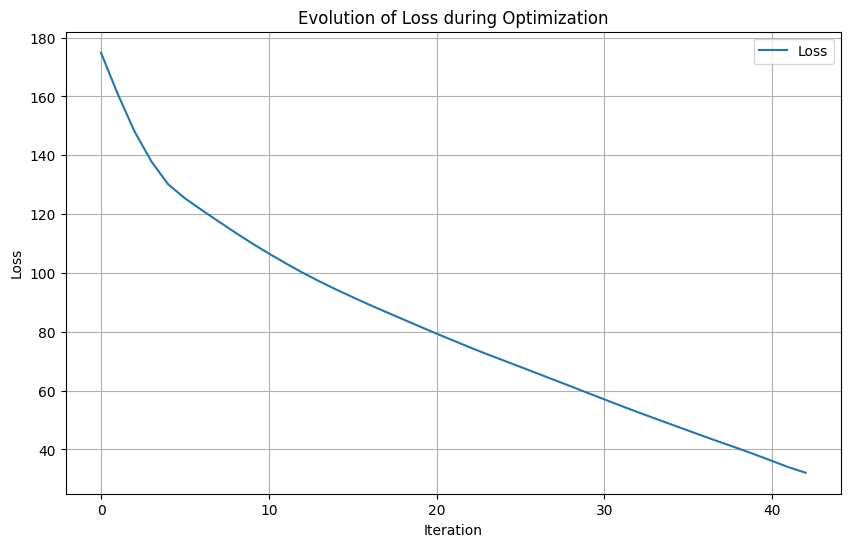

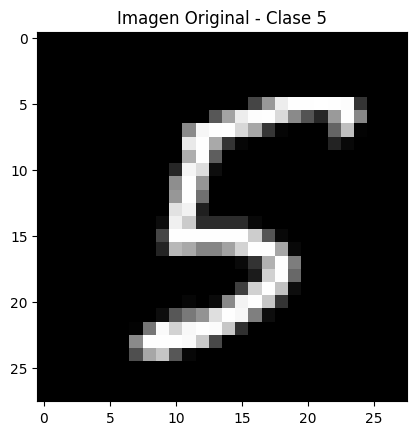

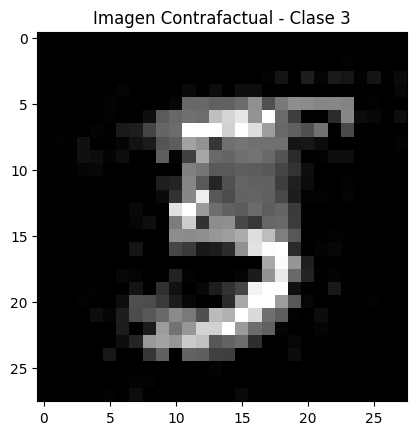

In [ ]:
from Methods.CounterfactualsGuidedbyPrototypes.Implementation import CounterfactualGenerator
import random

# Genera un número aleatorio entre 1 y 100
data_iter = iter(test_loader)
x_batch, y_batch = next(data_iter)

# Genera un índice aleatorio entre 0 y el tamaño del batch menos 1
random_index = random.randint(0, len(x_batch) - 1)

# Seleccionar la imagen y etiqueta aleatoria
x0 = x_batch[random_index].to(device).unsqueeze(0)
y0 = y_batch[random_index].to(device)
instancecgp = CounterfactualGenerator(fpred=fpred, ENC=encoder, AE=autoencoder)
x_cf = instancecgp.found_explanation(x0,X_train_sample.unsqueeze(1),verbose=False)
# Predicción del contrafactual
with torch.no_grad():
    pred_cf = classifier(x_cf).argmax(dim=1).item()
    pred_org = classifier(x0).argmax(dim=1).item()

# Mostrar la imagen contrafactual
plt.imshow(x0.cpu().numpy()[0][0], cmap='gray')
plt.title(f'Imagen Original - Clase {pred_org}')
plt.show()
plt.imshow(x_cf.cpu().numpy()[0][0], cmap='gray')
plt.title(f'Imagen Contrafactual - Clase {pred_cf}')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import torch
# import numpy as np

# # Calcular las diferencias absolutas entre la imagen original y la contrafactual
# difference = torch.abs(x0 - x_cf)

# # Normalizar las diferencias para que estén en [0, 1] (opcional para visualización)
# difference_normalized = (difference - difference.min()) / (difference.max() - difference.min())

# # Convertir a NumPy para visualización
# original_image = x0.cpu().numpy()[0][0]  # Imagen original [28, 28]
# counterfactual_image = x_cf.cpu().numpy()[0][0]  # Imagen contrafactual [28, 28]
# difference_map = difference_normalized.cpu().numpy()[0][0]  # Mapa de diferencias [28, 28]

# # Visualizar las imágenes y el mapa de diferencias
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# # Imagen original
# axes[0].imshow(original_image, cmap='gray')
# axes[0].set_title(f"Imagen Original - Clase {pred_org}")
# axes[0].axis('off')

# # Imagen contrafactual
# axes[1].imshow(counterfactual_image, cmap='gray')
# axes[1].set_title(f"Imagen Contrafactual - Clase {pred_cf}")
# axes[1].axis('off')

# # Mapa de diferencias
# axes[2].imshow(original_image, cmap='gray', alpha=0.5)  # Superpone la imagen original
# axes[2].imshow(difference_map, cmap='hot', alpha=0.5)  # Resalta las diferencias
# axes[2].set_title("Regiones Relevantes (Mapa de Diferencias)")
# axes[2].axis('off')

# plt.tight_layout()
# plt.show()
